# Questão 2
### Dataset: https://www.kaggle.com/c/titanic/data
### Baixando os dados  
Utilizou-se apenas o train.csv, pois ele tem as labels - saídas, 1 ou 0 se sobreviveu ou não.

In [51]:
import pandas as pd

df = pd.read_csv("data/train.csv")
print(f"Tamanho do df: {len(df)}")
print("Colunas:")
display(df.columns)
print("Valores nulos")
df.isna().sum()


Tamanho do df: 891
Colunas:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Valores nulos


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Observando as colunas

Colunas como Passanger Id, Name são pouco uteis para a análise, além disso, opta-se por retirar linhas que possuem valores nulos.

In [52]:
df = df.drop(columns=["Name", "PassengerId","Cabin","Ticket"])
df_median = df.copy()
df_median["Age"] = df["Age"].fillna(df["Age"].median())
df_drop = df.dropna(axis=0).copy()
print(f"Tamanho do df com mediana: {len(df_median)}")
print(f"Tamanho do df tirando todos os valores nulos: {len(df_drop)}")
df.isna().sum()

Tamanho do df com mediana: 891
Tamanho do df tirando todos os valores nulos: 712


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

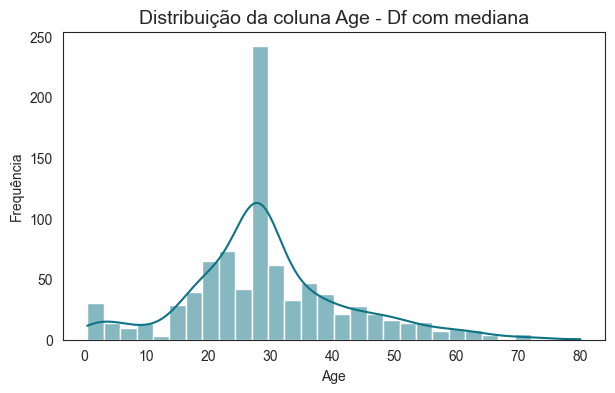

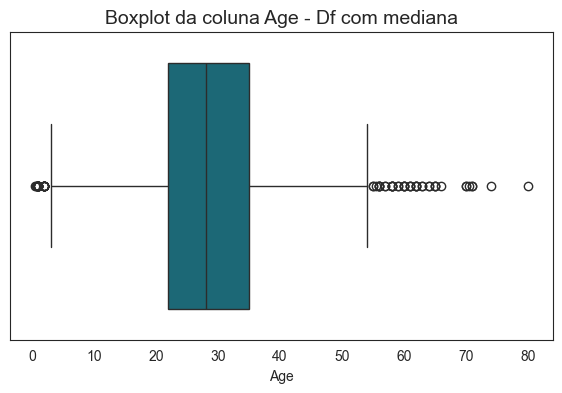

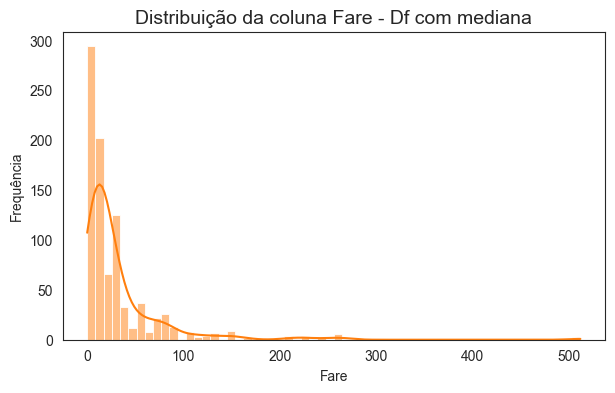

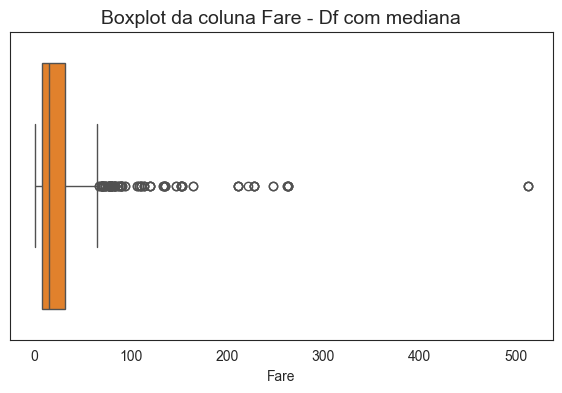

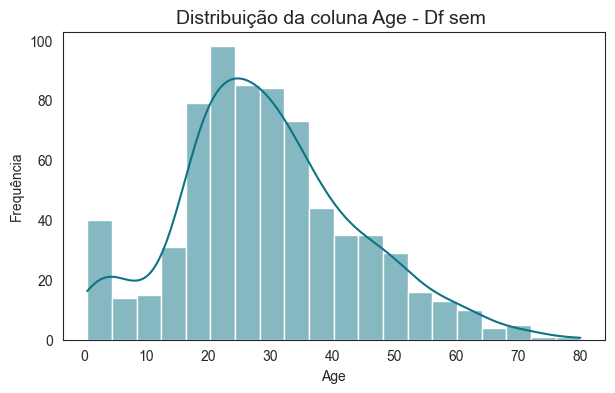

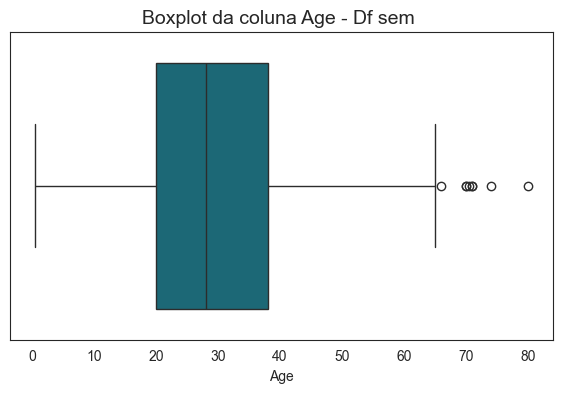

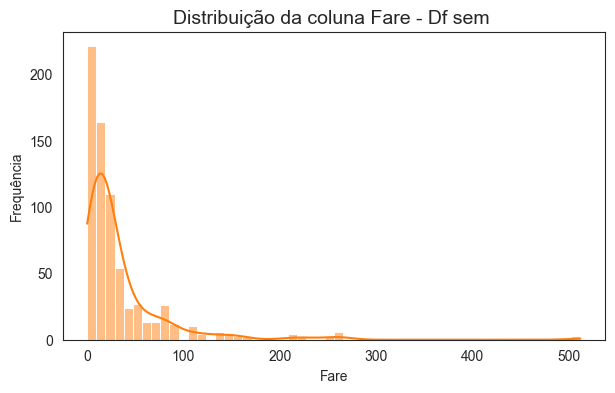

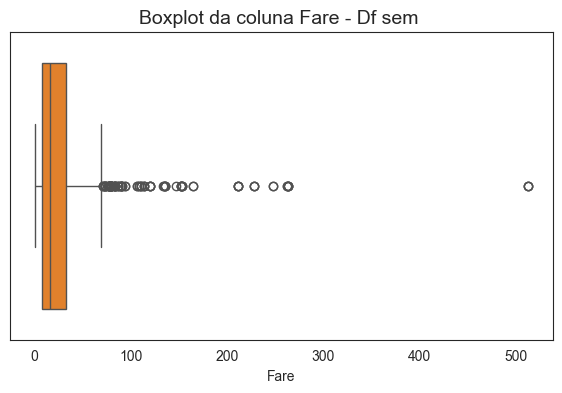

In [53]:
import matplotlib.pyplot  as plt
import seaborn as sns



def plot(df, nome):
    # Fonte e tamanho
    plt.rcParams['font.family'] = 'Poppins'
    plt.rcParams['figure.figsize'] = (7,4)
    
    # Estilo sem grid
    sns.set_style("white")  

    # Definindo cores
    colors = {"Age": "#0d7385", "Fare": "#ff7f0e"}

    for col in ["Age", "Fare"]:
        # Histograma
        plt.figure()
        sns.histplot(df[col].dropna(), kde=True, color=colors[col])
        plt.title(f"Distribuição da coluna {col} - {nome}", fontsize=14)
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

        # Boxplot
        plt.figure()
        sns.boxplot(x=df[col], color=colors[col])
        plt.title(f"Boxplot da coluna {col} - {nome}", fontsize=14)
        plt.xlabel(col)
        plt.show()


plot(df_median,"Df com mediana")
plot(df_drop,"Df sem ")

Observando os gráficos foi decidido utilizar log, que "puxa" valores muitos distantes para perto de média e normalizar as idades.

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler

df_median["Fare"] = np.log1p(df_median["Fare"])
df_drop["Fare"] = np.log1p(df_drop["Fare"])
df_median["Age"] = StandardScaler().fit_transform(df_median[["Age"]])
df_drop["Age"] = StandardScaler().fit_transform(df_drop[["Age"]])

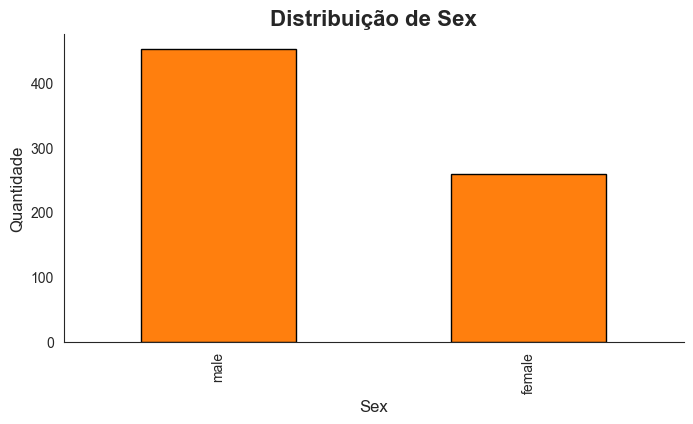

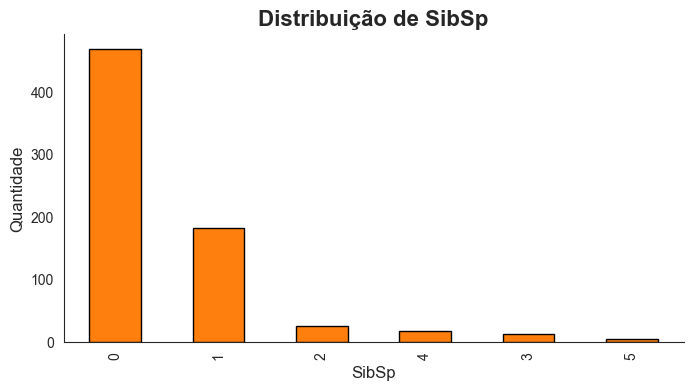

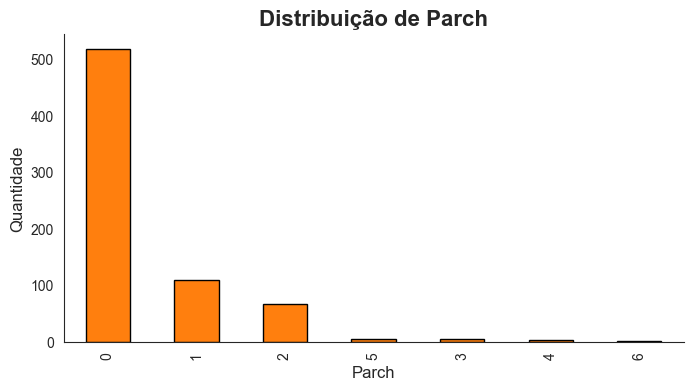

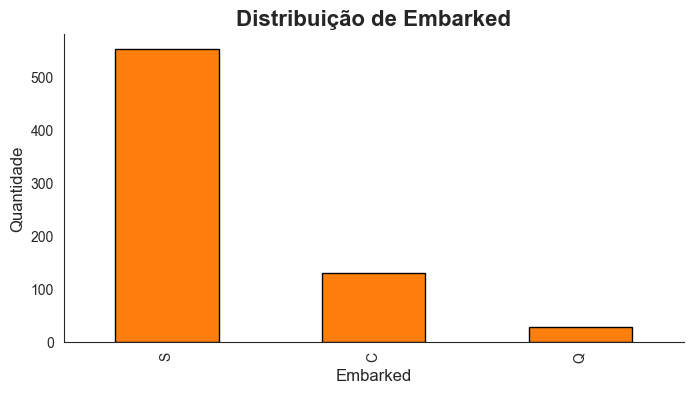

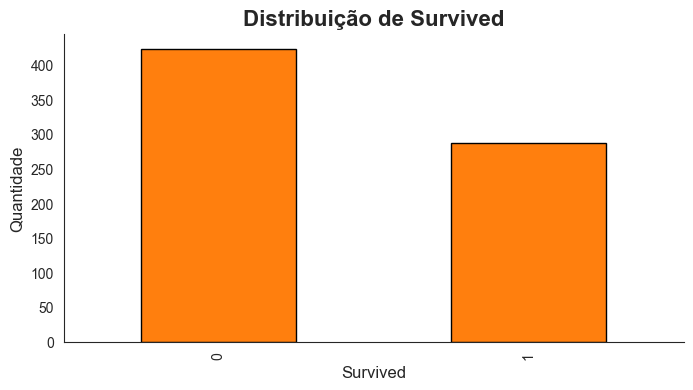

In [32]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configura fonte global
rcParams['font.family'] = 'Arial'

categoricas = ['Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
cor_barras = "#ff7f0e"  # cor das barras

for col in categoricas:
    plt.figure(figsize=(8, 4))
    df_drop[col].value_counts().plot(
        kind="bar",
        color=cor_barras,
        edgecolor="black"
    )
    plt.title(f"Distribuição de {col}", fontsize=16, fontweight="bold")
    plt.ylabel("Quantidade", fontsize=12)
    plt.xlabel(col, fontsize=12)

    # Remove grid
    plt.grid(False)

    # Estilo nos eixos
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.show()


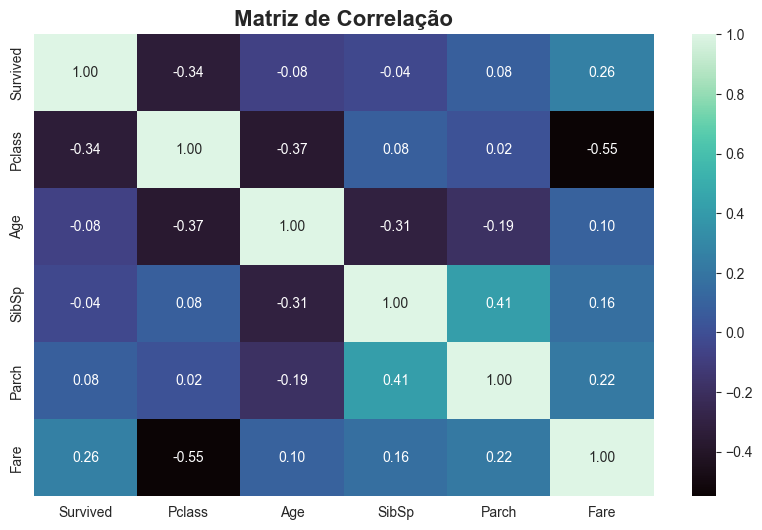

In [12]:
# Matriz de correlação
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="mako", fmt=".2f", cbar=True)

plt.title("Matriz de Correlação", fontsize=16, fontweight="bold")
plt.show()

C:\Users\thiag\AppData\Local\Temp\ipykernel_20136\1109359532.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_survived.values, y=corr_survived.index, palette="mako")


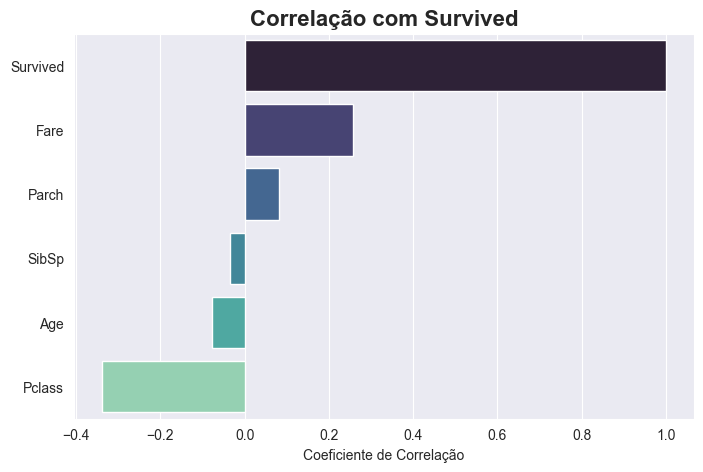

In [80]:
# Correlação apenas com Survived
corr_survived = corr["Survived"].sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_survived.values, y=corr_survived.index, palette="mako")

plt.title("Correlação com Survived", fontsize=16, fontweight="bold")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("")
plt.show()


--- Dataset com mediana ---
Época 20, Loss: 0.2596, Acurácia teste: 0.7955
Época 40, Loss: 0.3786, Acurácia teste: 0.8045
Época 60, Loss: 0.5163, Acurácia teste: 0.8045
Época 80, Loss: 0.3496, Acurácia teste: 0.8136
Época 100, Loss: 0.6107, Acurácia teste: 0.8091

Acurácia final: 0.8091

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       110
           1       0.82      0.79      0.81       110

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.81      0.81      0.81       220



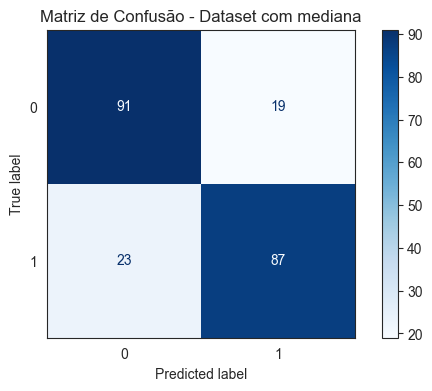

--- Dataset com drop de nulos ---
Época 20, Loss: 0.3419, Acurácia teste: 0.7588
Época 40, Loss: 0.4448, Acurácia teste: 0.7765
Época 60, Loss: 0.5922, Acurácia teste: 0.7647
Época 80, Loss: 0.2680, Acurácia teste: 0.7647
Época 100, Loss: 0.6836, Acurácia teste: 0.7941

Acurácia final: 0.7941

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.80        85
           1       0.83      0.74      0.78        85

    accuracy                           0.79       170
   macro avg       0.80      0.79      0.79       170
weighted avg       0.80      0.79      0.79       170



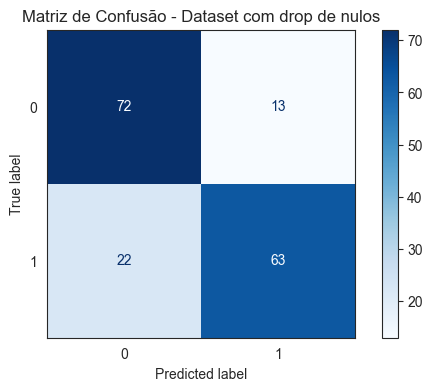

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# -------------------------
# Função para treinar rede neural
# -------------------------
def treinar_modelo_nn(df, nome="Dataset", epochs=100, batch_size=32, lr=0.001):
    print(f"--- {nome} ---")
    
    # Seleção de colunas
    X = df[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']].copy()
    y = df['Survived']

    
    # One-hot encoding
    X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
    
    # Balanceamento com SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    
    # Normalização das colunas numéricas
    scaler = StandardScaler()
    num_cols = ['Pclass','Age','Parch','Fare']
    X_res[num_cols] = scaler.fit_transform(X_res[num_cols])
    
    # Split treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
    )
    
    # Converter para tensores
    X_train = torch.tensor(X_train.values.astype('float32'))
    y_train = torch.tensor(y_train.values.astype('int64'))
    X_test  = torch.tensor(X_test.values.astype('float32'))
    y_test  = torch.tensor(y_test.values.astype('int64'))
    
    train_ds = TensorDataset(X_train, y_train)
    test_ds = TensorDataset(X_test, y_test)
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    
    # -------------------------
    # Definição da MLP
    # -------------------------
    class TitanicMLP(nn.Module):
        def __init__(self, input_dim):
            super(TitanicMLP, self).__init__()
            self.net = nn.Sequential(
                nn.Linear(input_dim, 64),
                nn.ReLU(),
                nn.Dropout(0.1),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 2)  # saída binária
            )
        def forward(self, x):
            return self.net(x)
    
    model = TitanicMLP(X_train.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # -------------------------
    # Treinamento
    # -------------------------
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
        
        if (epoch+1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                y_pred = torch.argmax(model(X_test), dim=1)
                acc = accuracy_score(y_test, y_pred)
            print(f"Época {epoch+1}, Loss: {loss.item():.4f}, Acurácia teste: {acc:.4f}")
    
    # -------------------------
    # Avaliação final
    # -------------------------
    model.eval()
    with torch.no_grad():
        y_pred = torch.argmax(model(X_test), dim=1)
    
    acc_final = accuracy_score(y_test, y_pred)
    print(f"\nAcurácia final: {acc_final:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()
    
    return model

# -------------------------
# Rodar nos datasets
# -------------------------
model_median = treinar_modelo_nn(df_median, "Dataset com mediana")
model_drop = treinar_modelo_nn(df_drop, "Dataset com drop de nulos")


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# -------------------------
# Função para treinar Decision Tree
# -------------------------
def treinar_modelo_tree(df, nome="Dataset", max_depth=None, min_samples_split=2, min_samples_leaf=1):
    print(f"--- {nome} ---")
    
    # Seleção de colunas
    X = df[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']].copy()
    y = df['Survived']
    
    # One-hot encoding
    X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
    
    # Balanceamento com SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    
    # Normalização (opcional para árvore, mas útil se você quiser comparar com outros modelos)
    scaler = StandardScaler()
    num_cols = ['Pclass','Age','Parch','Fare']
    X_res[num_cols] = scaler.fit_transform(X_res[num_cols])
    
    # Split treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
    )
    
    # -------------------------
    # Definição e treino da árvore
    # -------------------------
    tree = DecisionTreeClassifier(
        criterion="gini",      # ou "entropy"
        max_depth=max_depth,   # limite de profundidade (None = até as folhas puras)
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    tree.fit(X_train, y_train)
    
    # -------------------------
    # Avaliação
    # -------------------------
    y_pred = tree.predict(X_test)
    
    acc_final = accuracy_score(y_test, y_pred)
    print(f"Acurácia final: {acc_final:.4f}")
    print
    
tree_median = treinar_modelo_tree(df_median, "Dataset com mediana", max_depth=5)
tree_drop = treinar_modelo_tree(df_drop, "Dataset com drop de nulos", max_depth=5)

--- Dataset com mediana ---
Acurácia final: 0.7955
--- Dataset com drop de nulos ---
Acurácia final: 0.7765
